In [50]:
# Visualize the trend in triad balance of the network over previous 10 years
# Heron Ziegel
# 915986142

import numpy as np
import pandas as pd
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import math
import glob
import re

In [51]:
import ipynb.fs.full.utility_functions as util
import ipynb.fs.full.visualize_graph as vis

In [52]:
# UPDATE THESE VARIABLES TO CHANGE THE DATA & APPEARANCE

# Path where the data is stored
DATA_FILEPATH = '../Data/Timeline/'

# integer 1-6, changes how the graph visuals appear
SEED = 6

In [53]:
# Fill the array with graphs based on each CSV file in the folder (one CSV file = one year's network data)
timeline_graphs = {}

# Iterate over all CSV files in folder, create a new graph and append it to timeline_graphs
for file_name in glob.glob(DATA_FILEPATH+'*.csv'):
    df = pd.read_csv(file_name, index_col=0)
    input_data = df.to_numpy()
    column_names = df.columns
    G = util.newGraph(input_data, column_names)
    timeline_graphs[file_name[-8:-4]] = G

print(timeline_graphs)

{'2021': <networkx.classes.graph.Graph object at 0x13ea9a7d0>, '2020': <networkx.classes.graph.Graph object at 0x13ea92b50>, '2016': <networkx.classes.graph.Graph object at 0x108d30450>, '2017': <networkx.classes.graph.Graph object at 0x108d2f0d0>, '2019': <networkx.classes.graph.Graph object at 0x13e242b50>, '2018': <networkx.classes.graph.Graph object at 0x108c58d90>, '2022': <networkx.classes.graph.Graph object at 0x13e794550>, '2023': <networkx.classes.graph.Graph object at 0x13e987710>, '2024': <networkx.classes.graph.Graph object at 0x108e43550>, '2025': <networkx.classes.graph.Graph object at 0x13ea74950>}


In [58]:
# Create a new array of all the graphs and their structural balance
x = []
y = []

for i in timeline_graphs:
    y.append(util.structural_balance(timeline_graphs[i]))
    x.append(i)

print(x)
print(y)

['2021', '2020', '2016', '2017', '2019', '2018', '2022', '2023', '2024', '2025']
[0.1393939393939394, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.15757575757575756, 0.16363636363636364, 0.16363636363636364, 0.15151515151515152]


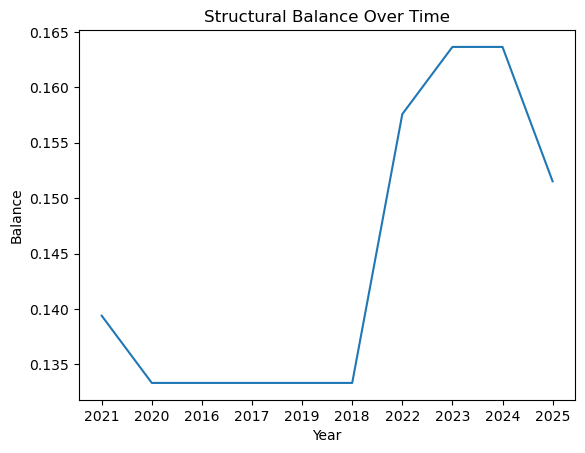

In [60]:
# Visualize the structural balance as a line graph

plt.plot(x, y)
plt.xlabel("Year")
plt.ylabel("Balance")
plt.title("Structural Balance Over Time")
plt.show()